# Importing Libraries and Packages

In [23]:
# Base
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# EDA
import missingno as msno

# Visualisation
import matplotlib.pyplot as plt


from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import plot_tree

# Text-Based Analyses
import gensim.downloader
from gensim.models import KeyedVectors
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.metrics.pairwise import cosine_similarity

# One-hot Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Voting
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# Classifiers
from sklearn.tree import DecisionTreeClassifier                                     
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV                
from sklearn.linear_model import SGDClassifier                                      
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors                                      
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC                                                        
from sklearn.ensemble import AdaBoostClassifier 

# Regressors
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch  

# Scalers and Transformers
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline                                               
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore, boxcox
from sklearn.model_selection import cross_val_score  

In [24]:
# Set Seed
SEED = 50

# Importing Data

In [25]:
# Import data
path = "data/kickstarter_projects.csv"

df_kickstarter = pd.read_csv(path)
df_kickstarter.head(2)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed


In [26]:
# Converting dates to datetime objects
df_kickstarter['Launched'] = pd.to_datetime(df_kickstarter['Launched'], format='%Y-%m-%d %H:%M:%S')
df_kickstarter['Deadline'] = pd.to_datetime(df_kickstarter['Deadline'], format='%Y-%m-%d')

# EDA

#### Data Overview

In [27]:
df_kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ID           374853 non-null  int64         
 1   Name         374853 non-null  object        
 2   Category     374853 non-null  object        
 3   Subcategory  374853 non-null  object        
 4   Country      374853 non-null  object        
 5   Launched     374853 non-null  datetime64[ns]
 6   Deadline     374853 non-null  datetime64[ns]
 7   Goal         374853 non-null  int64         
 8   Pledged      374853 non-null  int64         
 9   Backers      374853 non-null  int64         
 10  State        374853 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 31.5+ MB


In [28]:
df_kickstarter.describe()

,ID,Launched,Deadline,Goal,Pledged,Backers
count,3.748530e+05,374853,374853,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,2014-09-26 12:22:30.728664320,2014-10-30 04:00:35.149778944,4.586378e+04,9.121073e+03,106.690359
min,5.971000e+03,2009-04-21 21:02:48,2009-05-03 00:00:00,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2013-04-30 22:06:24,2013-06-01 00:00:00,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,2014-12-02 19:02:35,2015-01-06 00:00:00,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,2016-03-29 19:50:49,2016-05-01 00:00:00,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,2018-01-02 15:02:31,2018-03-03 00:00:00,1.663614e+08,2.033899e+07,219382.000000
std,6.191377e+08,NaN,NaN,1.158778e+06,9.132054e+04,911.718520


Suspect right-skewed distributions for Goal, Pledged, and Backers.

In [29]:
# Check for duplicates
df_kickstarter.duplicated().sum()

0

# Visualizations and Data Cleaning

#### Numerical feature distribution

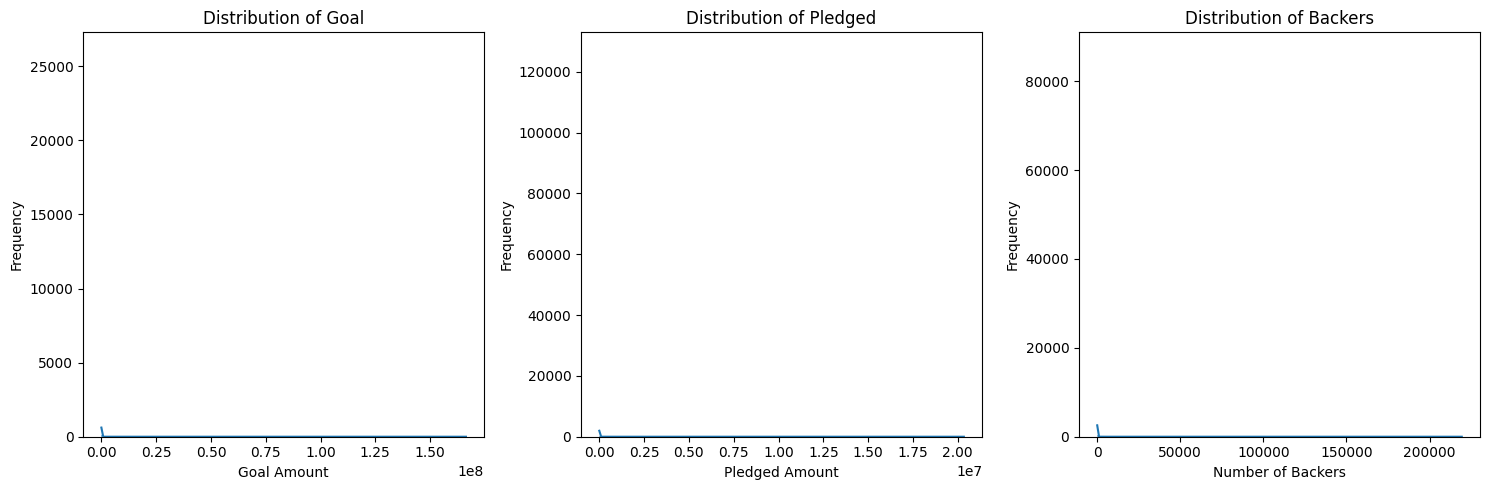

In [30]:
# Plotting Histograms of numeric columns Goal, Pledged, Backers
# WARNING: Running this takes forever
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_kickstarter['Goal'], kde=True)
plt.title('Distribution of Goal')
plt.xlabel('Goal Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df_kickstarter['Pledged'], kde=True)
plt.title('Distribution of Pledged')
plt.xlabel('Pledged Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df_kickstarter['Backers'], kde=True)
plt.title('Distribution of Backers')
plt.xlabel('Number of Backers')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [31]:
# Log transform the numerical columns. Handle potential errors from log(0)
def log_transform(x):
    return np.log1p(x)

df_kickstarter['log_Goal'] = log_transform(df_kickstarter['Goal'])
df_kickstarter['log_Pledged'] = log_transform(df_kickstarter['Pledged'])
df_kickstarter['log_Backers'] = log_transform(df_kickstarter['Backers'])

In [32]:
df_kickstarter.to_csv('df_kickstarter.csv', index=False)
df_kickstarter = pd.read_csv('df_kickstarter.csv')

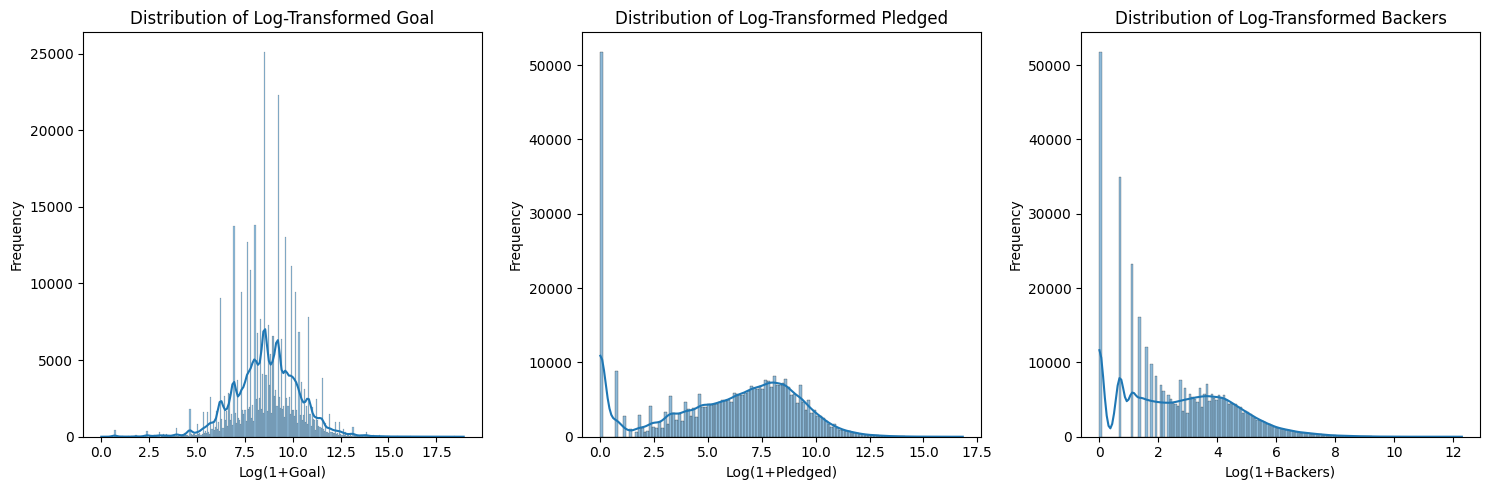

In [33]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_kickstarter['log_Goal'], kde=True)
plt.title('Distribution of Log-Transformed Goal')
plt.xlabel('Log(1+Goal)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df_kickstarter['log_Pledged'], kde=True)
plt.title('Distribution of Log-Transformed Pledged')
plt.xlabel('Log(1+Pledged)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df_kickstarter['log_Backers'], kde=True)
plt.title('Distribution of Log-Transformed Backers')
plt.xlabel('Log(1+Backers)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

log-transformed distributions look much better and more interpretable. Some observations:
- left peaks near zero: log-Pledged and log-Backers have sharp peak near 0 (very small or no funding/backers)
- distribution shapes: log-goal appears roughly symmetrical after transformation, indicating most projects have mid-range funding goals 

#### Correlation Analysis

In [34]:
# Select numerical columns for correlation analysis
numerical_cols = ['Goal', 'Pledged', 'Backers', 'log_Goal', 'log_Pledged', 'log_Backers']

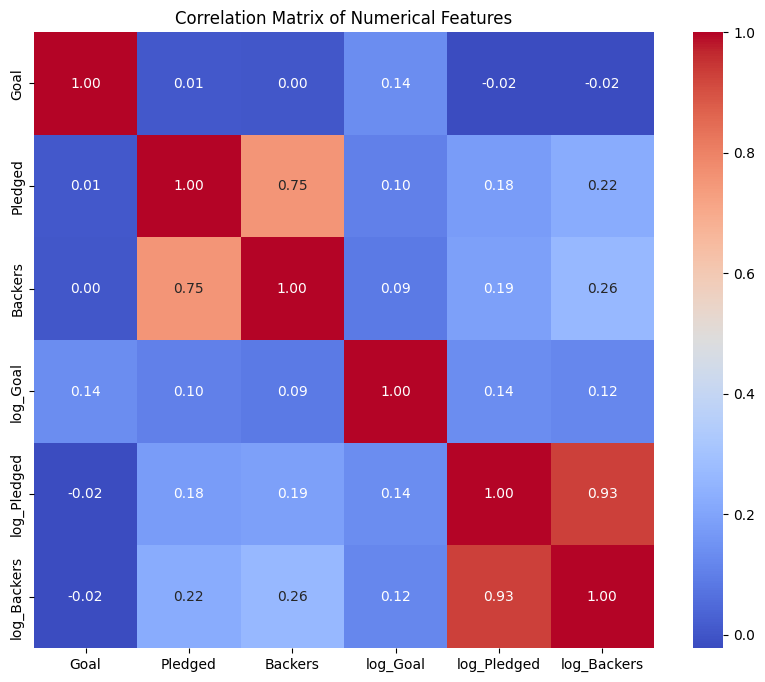

In [35]:
# Calculate and plot Correlation matrix
correlation_matrix = df_kickstarter[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

High correlation between 'Pledged' and 'Backers' bzw. 'log_Pledged' and 'log_Backers' - potentially problematic. Options to handle:
- drop 1 feature, keep the other
- combine them into a new feature that captures the information from both variables, e.g. 'Pledge_per_Backer' (Ratio to analyze funding efficiency)
- PCA to reduce multicollinearity and create uncorrelated components from highly correlated features
- algorithm-specific solutions: dtrees, xgb don't mind correlated features

#### Relationships with the Target Variable

In [254]:
df_kickstarter['State'].unique()

array(['Failed', 'Successful', 'Canceled', 'Suspended', 'Live'],
      dtype=object)

In [255]:
df_kickstarter.dtypes

ID                      int64
Name                   object
Category               object
Subcategory            object
Country                object
Launched       datetime64[ns]
Deadline       datetime64[ns]
Goal                    int64
Pledged                 int64
Backers                 int64
State                  object
log_Goal              float64
log_Pledged           float64
log_Backers           float64
dtype: object

In [256]:
# Filter for successful/failed campaigns and convert to binary
df_kickstarter_filtered = df_kickstarter[df_kickstarter['State'].isin(['Successful', 'Failed'])]
df_kickstarter_filtered['State_num'] = df_kickstarter_filtered['State'].map({'Successful': 1, 'Failed': 0})

In [257]:
df_kickstarter_filtered.dtypes

ID                      int64
Name                   object
Category               object
Subcategory            object
Country                object
Launched       datetime64[ns]
Deadline       datetime64[ns]
Goal                    int64
Pledged                 int64
Backers                 int64
State                  object
log_Goal              float64
log_Pledged           float64
log_Backers           float64
State_num               int64
dtype: object

In [258]:
df_kickstarter_filtered

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,log_Goal,log_Pledged,log_Backers,State_num
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,6.908755,6.439350,3.433987,0
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,11.289794,3.135494,1.386294,0
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,3.044522,3.583519,1.386294,1
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,4.605170,4.983607,3.258097,1
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,7.550135,5.961005,2.397895,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374310,749399445,Propeller Spring 2.0,Games,Games,Austria,2017-12-23 10:14:21,2017-12-26,36,270,36,Successful,3.610918,5.602119,3.610918,1
374400,1223058036,The Cowboy and The Spaceman: Android Collective+,Games,Tabletop Games,United Kingdom,2017-12-26 13:00:24,2017-12-31,271,545,25,Successful,5.605802,6.302619,3.258097,1
374458,1411606124,The CHAMPS Are Here!,Fashion,Apparel,United States,2017-12-27 03:52:38,2017-12-31,200,202,6,Successful,5.303305,5.313206,1.945910,1
374530,156799983,Kill Them All!,Games,Tabletop Games,United States,2017-12-28 01:48:58,2017-12-30,250,265,7,Successful,5.525453,5.583496,2.079442,1


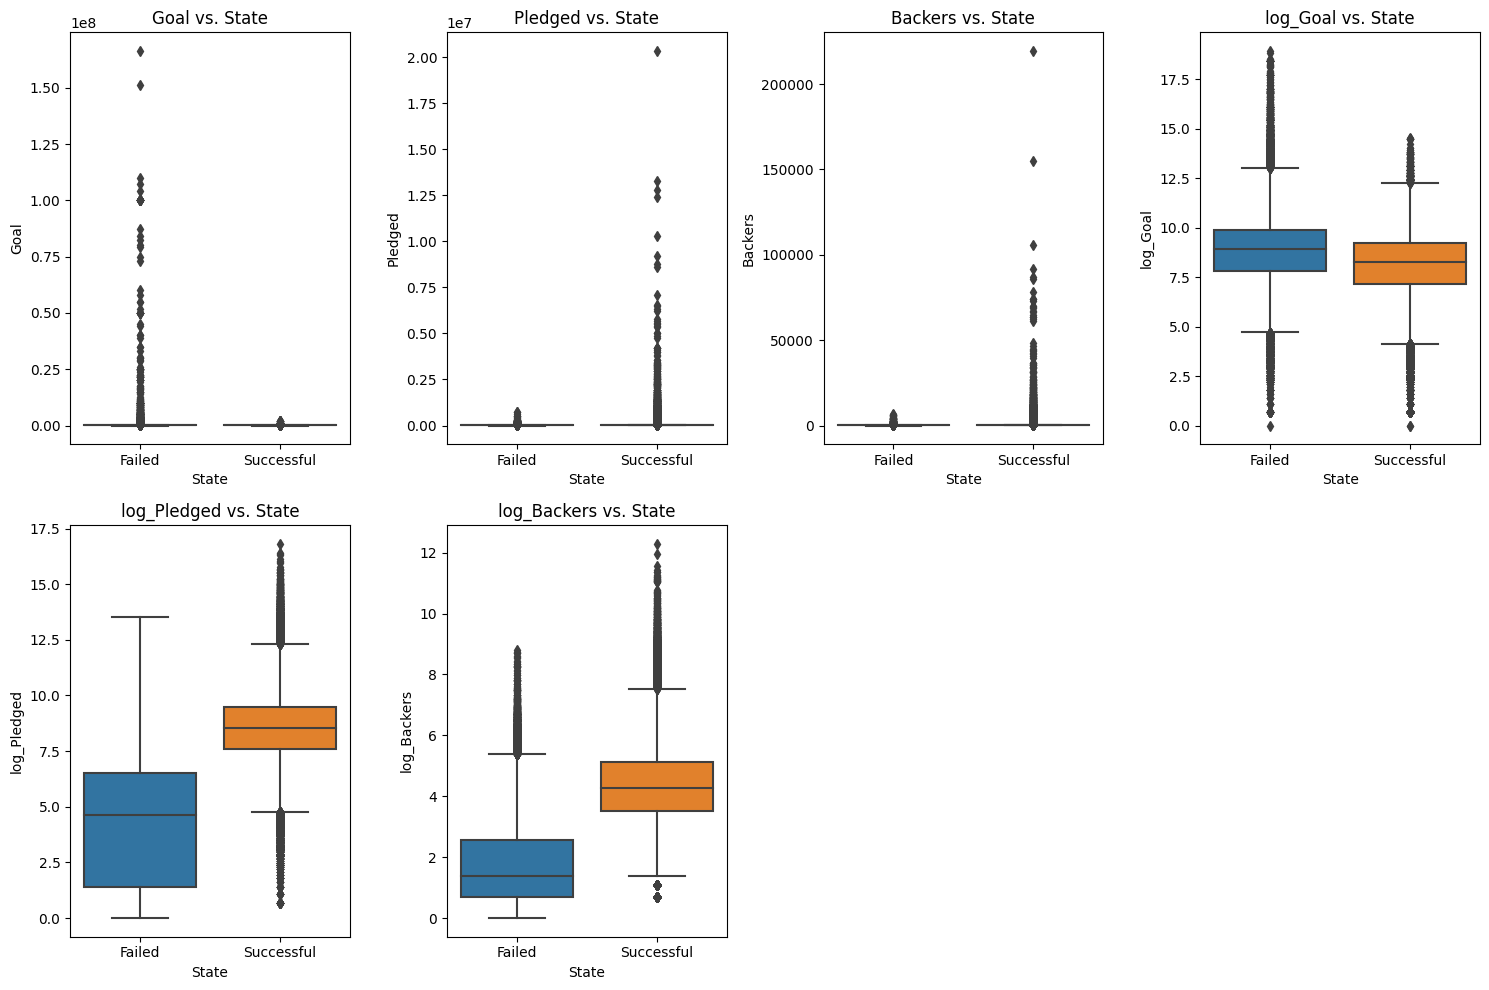

In [259]:
# Create box plots to compare distributions for successful vs. unsuccessful projects
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1)  # Adjust subplot layout if you have more features
    sns.boxplot(x='State', y=col, data=df_kickstarter_filtered)
    plt.title(f'{col} vs. State')

plt.tight_layout()
plt.show()


In [260]:
# Summary Statistics:
summary_stats = df_kickstarter_filtered.groupby('State')[numerical_cols].agg(['mean', 'median'])
print(summary_stats)

                    Goal               Pledged             Backers          
                    mean  median          mean  median        mean median   
State                                                                       
Failed      63189.223940  7500.0   1321.105434   100.0   16.431236    3.0  \
Successful   9535.703177  3840.0  22664.492249  5109.0  264.128397   71.0   

            log_Goal           log_Pledged           log_Backers            
                mean    median        mean    median        mean    median  
State                                                                       
Failed      8.891018  8.922792    4.219971  4.615121    1.682344  1.386294  
Successful  8.127745  8.253488    8.555972  8.538955    4.392724  4.276666  


#### Distribution of the Target Variable

In [261]:
# In absolute Numbers
state_counts = df_kickstarter_filtered['State'].value_counts()
print(state_counts)

State
Failed        197611
Successful    133851
Name: count, dtype: int64


In [262]:
# In Percentage
state_percentage = df_kickstarter_filtered['State'].value_counts(normalize=True) * 100
print(state_percentage)

State
Failed        59.617995
Successful    40.382005
Name: proportion, dtype: float64


In [263]:
df_kickstarter_filtered.dtypes

ID                      int64
Name                   object
Category               object
Subcategory            object
Country                object
Launched       datetime64[ns]
Deadline       datetime64[ns]
Goal                    int64
Pledged                 int64
Backers                 int64
State                  object
log_Goal              float64
log_Pledged           float64
log_Backers           float64
State_num               int64
dtype: object

# Data For Modeling

# Feature engineering

In [264]:
# Temporal patterns
df_kickstarter_filtered['ProjectDuration'] = (df_kickstarter_filtered['Deadline'] - df_kickstarter['Launched']).dt.days
df_kickstarter_filtered['LaunchYear'] = df_kickstarter_filtered['Launched'].dt.year
df_kickstarter_filtered['LaunchMonth'] = df_kickstarter_filtered['Launched'].dt.month
df_kickstarter_filtered['LaunchDay'] = df_kickstarter_filtered['Launched'].dt.day
df_kickstarter_filtered['DayOfWeek'] = df_kickstarter_filtered['Launched'].dt.dayofweek #0=Monday, 6=Sunday

In [265]:
# Percentage funded, handle 0 cases
def calculate_percentage_funded(row):
    if row['Goal'] == 0:
        if row['Pledged'] > 0:
            return 100  # 100% if Goal is 0 and Pledged > 0
        else:
            return 0    # 0% if Goal and Pledged are 0
    else:
        return (row['Pledged'] / row['Goal']) * 100

In [266]:
# Apply function
df_kickstarter_filtered['PercentageFunded'] = df_kickstarter_filtered.apply(calculate_percentage_funded, axis=1)

In [267]:
# Backers per Dollar pledged, handle 0 cases
def calculate_backers_per_dollar(row):
    if row['Pledged'] == 0:
        return 0 #Handle division by zero
    else:
        return row['Backers'] / row['Pledged']

In [268]:
# Apply function
df_kickstarter_filtered['BackersPerDollar'] = df_kickstarter_filtered.apply(calculate_backers_per_dollar, axis=1)

In [269]:
# Check new features
print(df_kickstarter_filtered[['Goal', 'Pledged', 'Backers', 'PercentageFunded', 'BackersPerDollar']].head())

    Goal  Pledged  Backers  PercentageFunded  BackersPerDollar
0   1000      625       30         62.500000          0.048000
1  80000       22        3          0.027500          0.136364
2     20       35        3        175.000000          0.085714
3     99      145       25        146.464646          0.172414
4   1900      387       10         20.368421          0.025840


In [270]:
df_kickstarter_filtered.Category.unique()

array(['Fashion', 'Film & Video', 'Art', 'Technology', 'Journalism',
       'Publishing', 'Music', 'Photography', 'Games', 'Design', 'Theater',
       'Crafts', 'Comics', 'Food', 'Dance'], dtype=object)

In [271]:
column_list = df_kickstarter_filtered.columns.tolist()
column_list

['ID',
 'Name',
 'Category',
 'Subcategory',
 'Country',
 'Launched',
 'Deadline',
 'Goal',
 'Pledged',
 'Backers',
 'State',
 'log_Goal',
 'log_Pledged',
 'log_Backers',
 'State_num',
 'ProjectDuration',
 'LaunchYear',
 'LaunchMonth',
 'LaunchDay',
 'DayOfWeek',
 'PercentageFunded',
 'BackersPerDollar']

In [272]:
df_kickstarter_filtered_columns_1 = ['Category', 'Country', 'log_Pledged', 'log_Goal', 'log_Backers', 'ProjectDuration', 'LaunchYear', 'LaunchMonth', 'DayOfWeek', 'PercentageFunded', 'BackersPerDollar', 'State_num']
df_modeling = df_kickstarter_filtered[df_kickstarter_filtered_columns_1]
df_modeling['State_num'].dtypes

dtype('int64')

## Correlation of Categorical features and y pred

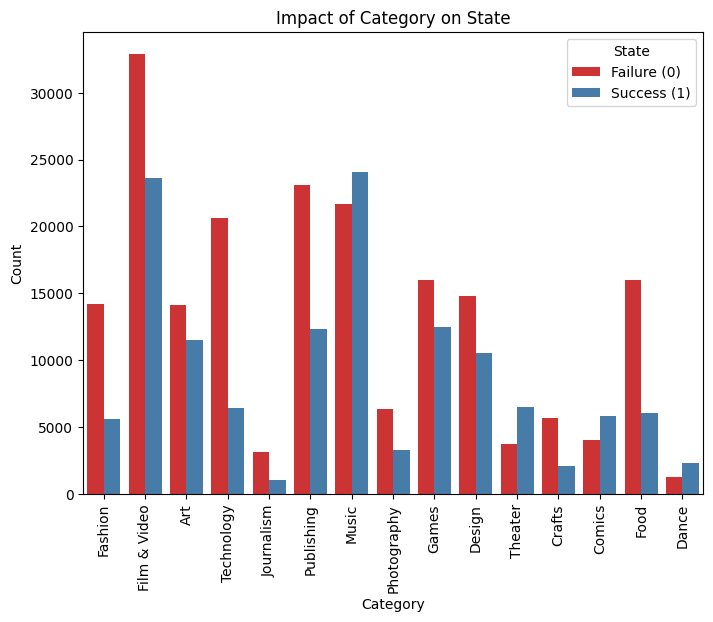

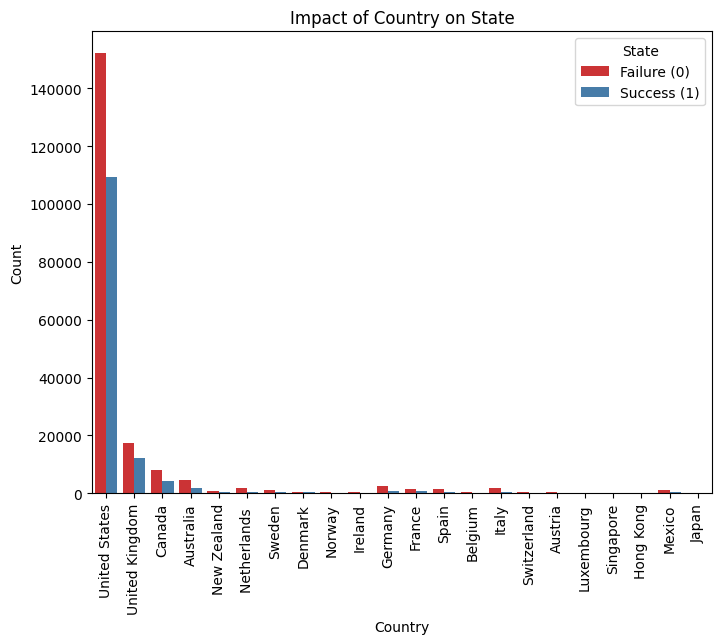

In [273]:
# 1. Category vs. State Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', hue='State_num', data=df_modeling, palette='Set1')
plt.title('Impact of Category on State')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='State', labels=['Failure (0)', 'Success (1)'])
plt.xticks(rotation=90)
plt.show()

# 2. Country vs. State Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Country', hue='State_num', data=df_modeling, palette='Set1')
plt.title('Impact of Country on State')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='State', labels=['Failure (0)', 'Success (1)'])
plt.show()

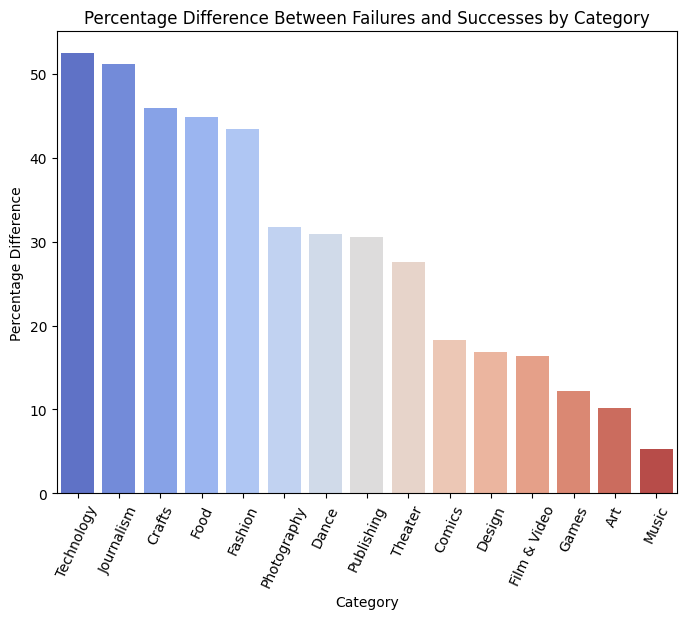

In [350]:
# Step 1: Preprocess the data to calculate percentages and differences
category_counts = df_modeling.groupby(['Category', 'State_num']).size().unstack(fill_value=0)
category_percentages = category_counts.div(category_counts.sum(axis=1), axis=0) * 100  # Convert to percentages
category_percentages['Difference'] = abs(category_percentages[0] - category_percentages[1])  # Calculate percentage difference

# Step 2: Prepare a DataFrame for plotting
percentage_diff_df = category_percentages[['Difference']].reset_index()

# Step 3: Sort by percentage difference
percentage_diff_df = percentage_diff_df.sort_values(by='Difference', ascending=False)

# Step 4: Plot the percentage differences
plt.figure(figsize=(8, 6))
sns.barplot(
    x='Category',
    y='Difference',
    data=percentage_diff_df,
    palette='coolwarm',  # Choose a suitable palette
)
plt.title('Percentage Difference Between Failures and Successes by Category')
plt.xlabel('Category')
plt.ylabel('Percentage Difference')
plt.xticks(rotation=65)

# Save the plot
plt.savefig('category_percentage_difference_2.jpg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

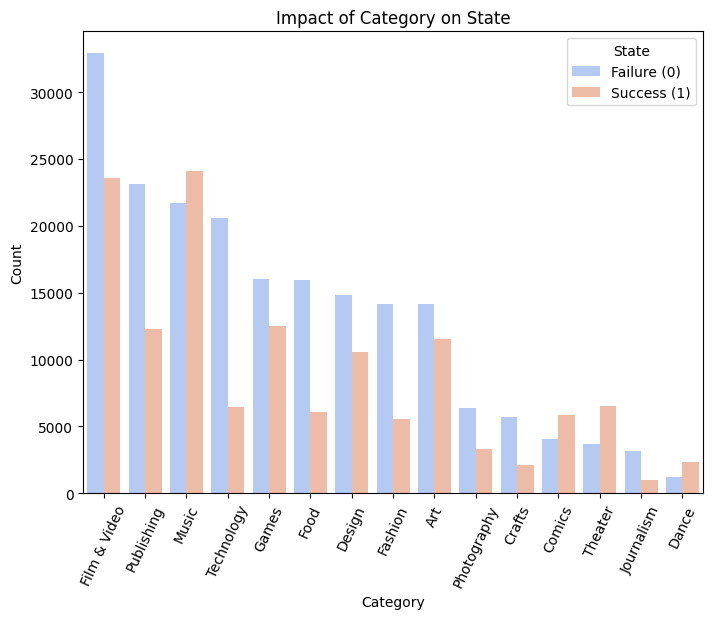

In [353]:
# Step 1: Preprocess the data to calculate the counts for each Category and State
category_counts = df_modeling.groupby(['Category', 'State_num']).size().unstack(fill_value=0)

# Step 2: Sort categories by the count of failures (State_num == 0)
sorted_categories = category_counts.sort_values(by=0, ascending=False).index

# Step 1: Preprocess the data to calculate the counts for each Category and State
category_counts = df_modeling.groupby(['Category', 'State_num']).size().unstack(fill_value=0)

# Step 2: Sort categories by the count of failures (State_num == 0)
sorted_categories = category_counts.sort_values(by=0, ascending=False).index

# Step 3: Plot the countplot with sorted categories
custom_palette = {0: '#fa9fb5', 1: '#3182bd'}

plt.figure(figsize=(8, 6))
sns.countplot(
    x='Category',
    hue='State_num',
    data=df_modeling,
    order=sorted_categories,  # Pass the sorted order
    palette='coolwarm'
)
plt.title('Impact of Category on State')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='State', labels=['Failure (0)', 'Success (1)'])
plt.xticks(rotation=65)
plt.savefig('category_vs_state_barplot.jpg', dpi=300, bbox_inches='tight')
plt.show()

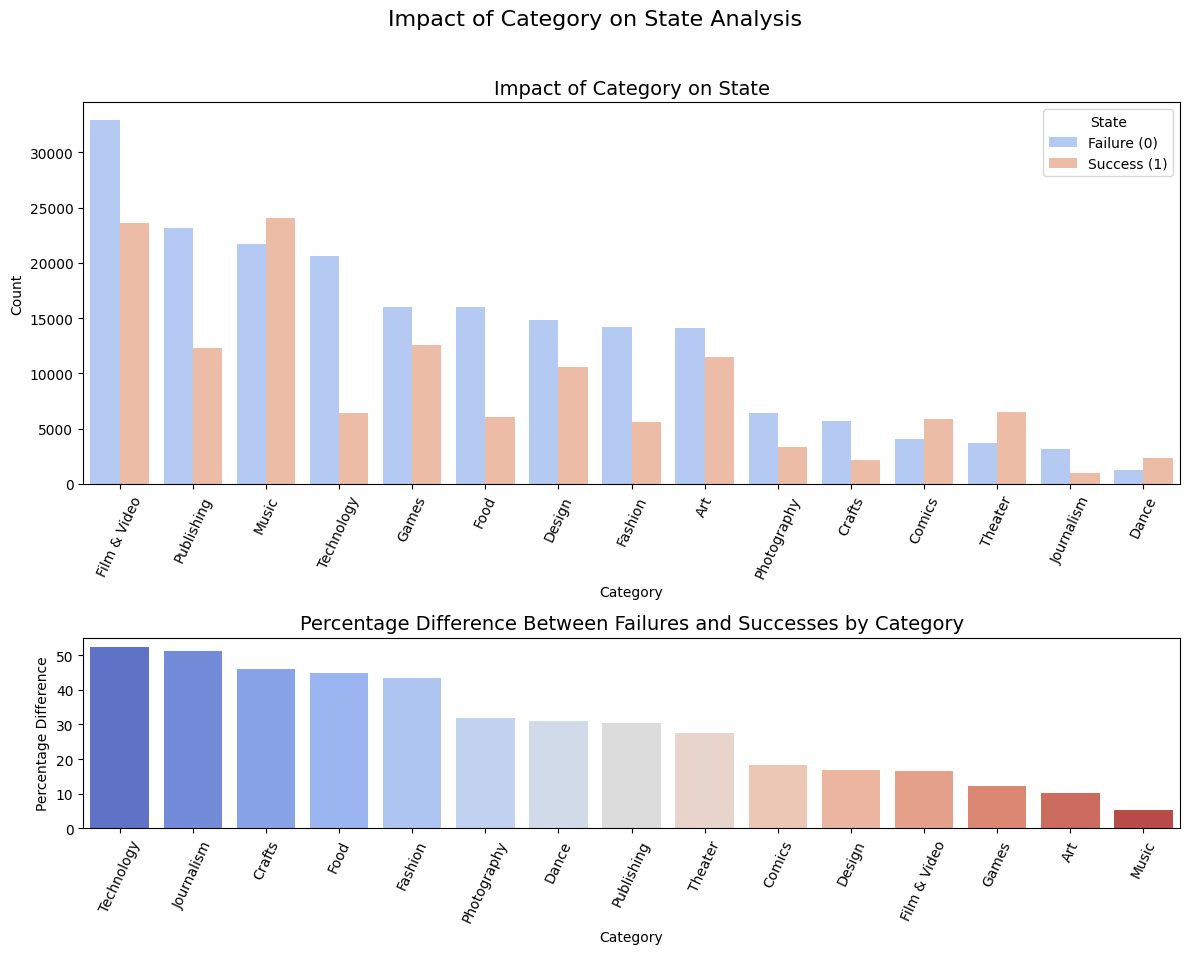

In [356]:
import matplotlib.gridspec as gridspec
# Step 1: Preprocess data for the percentage difference plot (as calculated earlier)
category_counts = df_modeling.groupby(['Category', 'State_num']).size().unstack(fill_value=0)
category_percentages = category_counts.div(category_counts.sum(axis=1), axis=0) * 100  # Convert to percentages
category_percentages['Difference'] = abs(category_percentages[0] - category_percentages[1])  # Calculate percentage difference

percentage_diff_df = category_percentages[['Difference']].reset_index()
percentage_diff_df = percentage_diff_df.sort_values(by='Difference', ascending=False)

# Step 2: Create the figure with Gridspec
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])  # 2 rows, 1 column

# Subplot 1: Impact of Category on State
ax1 = fig.add_subplot(gs[0])
sns.countplot(
    x='Category',
    hue='State_num',
    data=df_modeling,
    order=category_counts.sort_values(by=0, ascending=False).index,
    palette='coolwarm',  # Custom colors
    ax=ax1
)
ax1.set_title('Impact of Category on State', fontsize=14)
ax1.set_xlabel('Category')
ax1.set_ylabel('Count')
ax1.legend(title='State', labels=['Failure (0)', 'Success (1)'])
ax1.tick_params(axis='x', rotation=65)

# Subplot 2: Percentage Difference Between Failures and Successes
ax2 = fig.add_subplot(gs[1])
sns.barplot(
    x='Category',
    y='Difference',
    data=percentage_diff_df,
    palette='coolwarm',  # Gradient palette for better visuals
    ax=ax2
)
ax2.set_title('Percentage Difference Between Failures and Successes by Category', fontsize=14)
ax2.set_xlabel('Category')
ax2.set_ylabel('Percentage Difference')
ax2.tick_params(axis='x', rotation=65)

# Step 3: Add overall slide title
fig.suptitle('Impact of Category on State Analysis', fontsize=16, y=0.95)

# Step 4: Save the slide
plt.tight_layout(rect=[0, 0, 1, 0.93])  # Adjust layout to include the suptitle
plt.savefig('category_impact_analysis_slide.jpg', dpi=300, bbox_inches='tight')

# Step 5: Show the combined plot
plt.show()

* There are categories that have a higher chance of failure than success : Technology, Journalism, Publishing, Food, Fashion which means that category type is a strong prediction factor

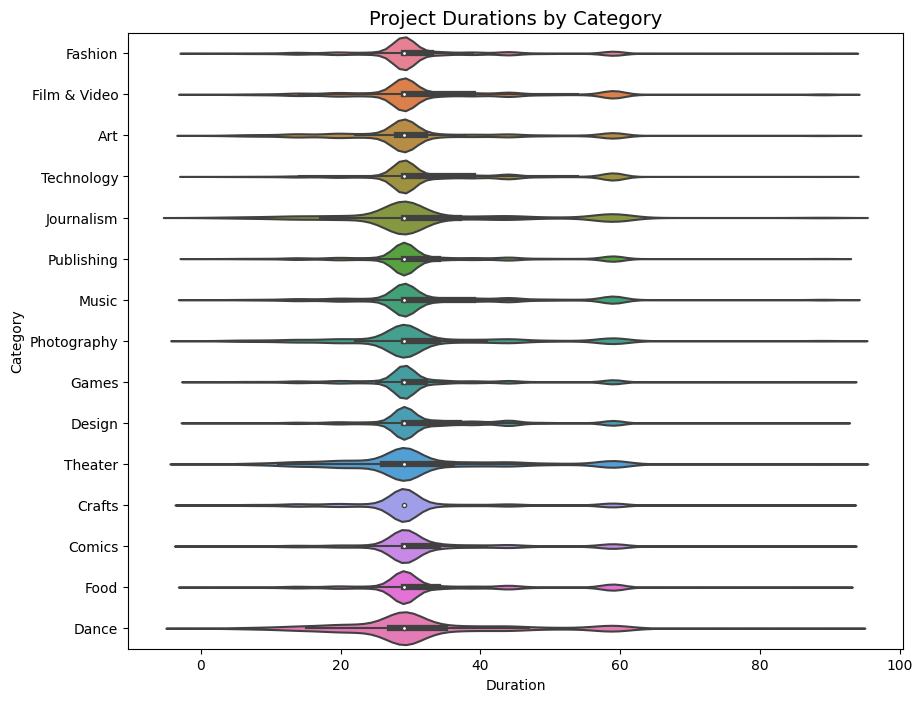

In [357]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# Plotting a horizontal violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(
    x='ProjectDuration',
    y='Category',
    data=df_modeling,
    palette='husl',  # Replace with your desired palette
    scale='width'
)

# Adding titles and labels
plt.title('Project Durations by Category', fontsize=14)
plt.xlabel('Duration')
plt.ylabel('Category')

# Save or display the plot
plt.savefig('project_durations_violinplot.png', dpi=300, bbox_inches='tight')
plt.show()

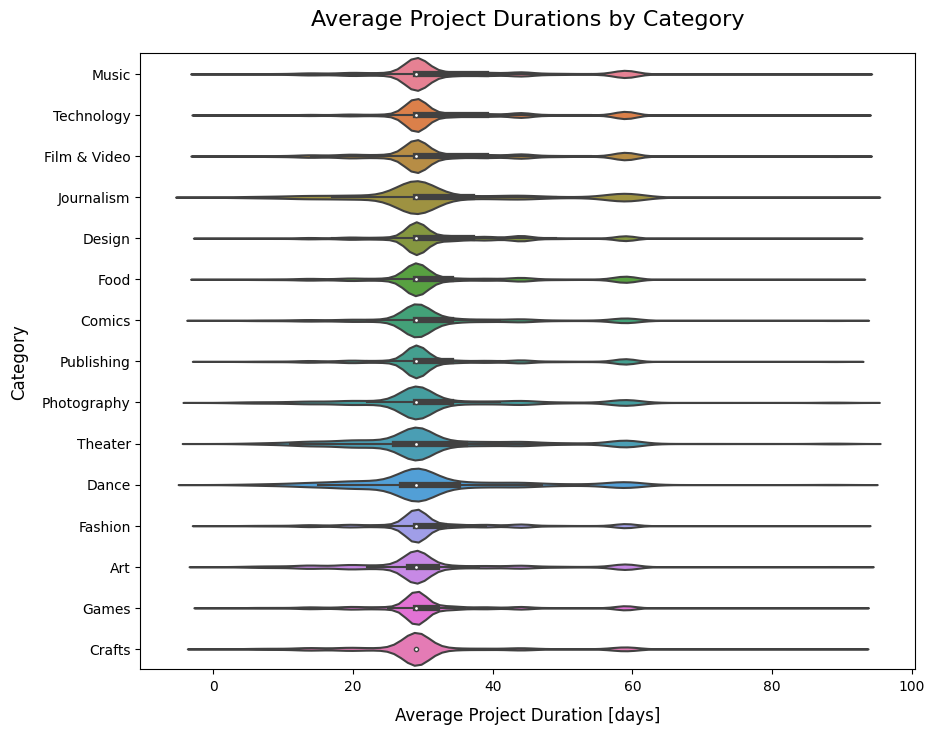

In [366]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the order of categories by average ProjectDuration
ordered_categories = (
    df_modeling.groupby('Category')['ProjectDuration']
    .mean()
    .sort_values(ascending=False)
    .index
)

# Plotting a horizontal violin plot with ordered categories
plt.figure(figsize=(10, 8))
sns.violinplot(
    x='ProjectDuration',
    y='Category',
    data=df_modeling,
    order=ordered_categories,  # Pass the ordered categories
    palette='husl',            # Replace with your desired palette
    scale='width'
)

# Adding titles and labels
plt.title('Average Project Durations by Category', fontsize=16, pad=20)
plt.xlabel('Average Project Duration [days]', fontsize=12, labelpad=10)
plt.ylabel('Category', fontsize=12, labelpad=10)

# Save or display the plot
plt.savefig('project_durations_ordered_violinplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [359]:
ordered_categories = (
    df_modeling.groupby('Category')['ProjectDuration']
    .mean()
    .sort_values(ascending=False)
    .index
)

In [360]:
ordered_categories

Index(['Music', 'Technology', 'Film & Video', 'Journalism', 'Design', 'Food',
       'Comics', 'Publishing', 'Photography', 'Theater', 'Dance', 'Fashion',
       'Art', 'Games', 'Crafts'],
      dtype='object', name='Category')

### Correlation of num features and y pred

In [274]:
# Assuming 'y' is the target column and df contains the features
num_col = ['log_Pledged', 'log_Goal', 'ProjectDuration', 'log_Backers', 'ProjectDuration', 'PercentageFunded', 'BackersPerDollar', 'State_num']
num_df = df_modeling[num_col]
correlation_matrix = num_df.corr()  # Compute correlation matrix for all columns
correlation_with_y = correlation_matrix['State_num']  # Get the correlation with target 'y'

# Print the correlation with the target variable 'y'
print(correlation_matrix)
print('-------------------------------------------------------------------')
print(correlation_with_y)

                  log_Pledged  log_Goal  ProjectDuration  log_Backers   
log_Pledged          1.000000  0.139635        -0.031196     0.930939  \
log_Goal             0.139635  1.000000         0.185845     0.125531   
ProjectDuration     -0.031196  0.185845         1.000000    -0.047484   
log_Backers          0.930939  0.125531        -0.047484     1.000000   
ProjectDuration     -0.031196  0.185845         1.000000    -0.047484   
PercentageFunded     0.013644 -0.042272         0.002898     0.019093   
BackersPerDollar    -0.341635 -0.015099         0.008944    -0.225222   
State_num            0.654221 -0.224604        -0.116466     0.703686   

                  ProjectDuration  PercentageFunded  BackersPerDollar   
log_Pledged             -0.031196          0.013644         -0.341635  \
log_Goal                 0.185845         -0.042272         -0.015099   
ProjectDuration          1.000000          0.002898          0.008944   
log_Backers             -0.047484          0.01909

### Skip log_Pledged - the correlation between log_Backers and log_Pledged is too high 

# Text-Based Analysis

In [275]:
df_kickstarter_filtered['Name'].value_counts()

Name
New EP/Music Development                                        13
Music Video                                                     11
New EP / Music Development                                      10
Reflections                                                      9
Debut Album                                                      9
                                                                ..
Good to Grow Farm                                                1
Imagine Nations                                                  1
EZDOCK1        The best universal dock for Smartphones -etc.     1
Multi-Story Short Film                                           1
Collaboration with Snoop Dogg                                    1
Name: count, Length: 329386, dtype: int64

In [276]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Marcelina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marcelina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [277]:
# Preprocess text: remove punctuation, convert to lowercase, remove stopwords
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = text.lower()
    text = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]
    stemmer = PorterStemmer()
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

In [278]:
# Apply preprocessing to 'Name' column
df_kickstarter_filtered['cleaned_name'] = df_kickstarter_filtered['Name'].apply(preprocess_text)

In [279]:
# Load GloVe embeddings in batches
glove_file = 'data/glove.6B.50d.txt'
glove_model = {}

with open(glove_file, 'r', encoding='utf-8') as f: #Open the file
    for line in f:
        parts = line.strip().split()
        word = parts[0]
        vector = np.array(parts[1:], dtype=float) #Convert vector string parts to floats
        glove_model[word] = vector #Store the word and vector in the dictionary

print(f"GloVe model '{glove_file}' loaded successfully (in batches).")

GloVe model 'data/glove.6B.50d.txt' loaded successfully (in batches).


In [280]:
# Use glove_model dictionary to create document vectors
def create_document_vector(title, glove_model):
    words = title.split()
    vectors = []
    for word in words:
        if word in glove_model: #Check if the word is actually in the dict
            vectors.append(glove_model[word])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(50) #50 because we use the 50-dimensional GloVe embeddings

In [281]:
# Apply function
df_kickstarter_filtered['glove_vector'] = df_kickstarter_filtered['cleaned_name'].apply(lambda x: create_document_vector(x, glove_model))

In [282]:
# Check and verify embedding
print(df_kickstarter_filtered[['cleaned_name', 'glove_vector']].head())

                          cleaned_name   
0  grace jone give f tshirt limit edit  \
1           crystal antler untitl movi   
2                          draw dollar   
3           offlin wikipedia iphon app   
4                            pantshirt   

                                        glove_vector  
0  [-0.3222083333333333, 0.2537066666666667, 0.23...  
1  [0.018195000000000003, 0.5830099999999999, -0....  
2  [0.071995, 0.270575, 0.322445, -0.053245, 0.11...  
3  [0.027579999999999993, -0.368622, 0.9563200000...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  


In [283]:
# Zero vector analysis 
def is_zero_vector(vector):
    return all(v == 0 for v in vector)

zero_vector_count = df_kickstarter_filtered['glove_vector'].apply(is_zero_vector).sum()
total_vectors = len(df_kickstarter_filtered)
zero_vector_percentage = (zero_vector_count / total_vectors) * 100

print(f"Number of zero vectors: {zero_vector_count}/{total_vectors}")
print(f"Percentage of zero vectors: {zero_vector_percentage:.2f}%")

Number of zero vectors: 15886/331462
Percentage of zero vectors: 4.79%


In [284]:
# Quality Control: Cosine Similarity Analysis
def calculate_cosine_similarity(title1, title2, glove_model):
    vec1 = create_document_vector(title1, glove_model)
    vec2 = create_document_vector(title2, glove_model)
    similarity = cosine_similarity([vec1], [vec2])[0][0]  #Get the single similarity score
    return similarity

In [285]:
# Cluster to find similar project names
glove_matrix = np.array(df_kickstarter_filtered['glove_vector'].tolist())

# Scale the data (important for KMeans)
scaler = StandardScaler()
glove_matrix_scaled = scaler.fit_transform(glove_matrix)

# Choose the number of clusters (k) – experiment to find a good value
k = 10  #Start with a small number and experiment. You can use the elbow method to determine k.
kmeans = KMeans(n_clusters=k, random_state=42) #setting random state for reproducibility.
kmeans.fit(glove_matrix_scaled)

df_kickstarter_filtered['cluster'] = kmeans.labels_

# Find similar titles within the same cluster.
for i in range(k):
    cluster_df = df_kickstarter_filtered[df_kickstarter_filtered['cluster'] == i]
    print(f"Cluster {i}:")
    print(cluster_df[['Name', 'cleaned_name']].head()) #Show top few titles in each cluster

Cluster 0:
                                                 Name   
9   Sponsor Dereck Blackburn (Lostwars) Artist in ...  \
15  You Are Among Friends: a book for the little s...   
42                             Hand made guitar picks   
48                                      Mr. Squiggles   
66  Jay Bennett's "Whatever Happened I Apologize" ...   

                                         cleaned_name  
9   sponsor dereck blackburn lostwar artist resid ...  
15               among friend book littl sister never  
42                              hand made guitar pick  
48                                         mr squiggl  
66             jay bennett whatev happen apolog vinyl  
Cluster 1:
                                                 Name   
1                      CRYSTAL ANTLERS UNTITLED MOVIE  \
24                                As The Dust Settles   
39                 Fruit Slinger: From farm to market   
51                      goopymart: chimples plush toy   
56  Choose You

In [286]:
# Pick example pairs for cosine similarity analysis. 
# Strategy: similar pairs (within-cluster), dissimilar pairs (between-clusters), and edge cases (diverse titles)
example_pairs = [
    # similar pairs within clusters
    ("offlin wikipedia iphon app", "icon iphon app"), #Cluster 3
    ("crystal antler untitl movi", "might becom movi"), #Cluster 1 and 7 - interesting
    ("hand made guitar pick", "new kitchen tool"), #Cluster 0 and 2 - dissimilar
    
    # dissimilar pairs between clusters
    ("offlin wikipedia iphon app", "hand made guitar pick"),
    ("web site short horror film", "mr squiggl"),
    ("logic guess pictur 2nd horror movi ", "kicey iceland")
]

In [287]:
for example_pair in example_pairs:
    similarity = calculate_cosine_similarity(example_pair[0], example_pair[1], glove_model)
    print(f"Cosine similarity between '{example_pair[0]}' and '{example_pair[1]}': {similarity:.3f}")

Cosine similarity between 'offlin wikipedia iphon app' and 'icon iphon app': 0.774
Cosine similarity between 'crystal antler untitl movi' and 'might becom movi': 0.127
Cosine similarity between 'hand made guitar pick' and 'new kitchen tool': 0.732
Cosine similarity between 'offlin wikipedia iphon app' and 'hand made guitar pick': 0.187
Cosine similarity between 'web site short horror film' and 'mr squiggl': 0.273
Cosine similarity between 'logic guess pictur 2nd horror movi ' and 'kicey iceland': 0.020


# Flatten GloVe vector 

In [288]:
# Flatten GloVe vectors into separate columns
glove_vectors = np.vstack(df_kickstarter_filtered['glove_vector'].values)
# Convert 2D array into a DF with appropriate column names
glove_df = pd.DataFrame(glove_vectors, columns=[f'glove_dim_{i+1}' for i in range(glove_vectors.shape[1])])
# Handle NaNs: fill with 0
glove_df = glove_df.fillna(0)
# Drop original glove_vector column and concatenate the new GloVe columns
df_kickstarter_filtered = df_kickstarter_filtered.drop(columns=['glove_vector']).reset_index(drop=True)
df_kickstarter_filtered = pd.concat([df_kickstarter_filtered, glove_df], axis=1)

In [315]:
df_kickstarter_filtered.head(2)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,...,glove_dim_41,glove_dim_42,glove_dim_43,glove_dim_44,glove_dim_45,glove_dim_46,glove_dim_47,glove_dim_48,glove_dim_49,glove_dim_50
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,...,0.577028,0.098219,-0.012910,0.192917,-0.462681,0.146407,0.290702,0.121433,-0.199544,0.583431
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,...,0.022000,0.410410,-0.590275,0.310705,0.238130,-0.112285,0.650350,-0.519725,-0.099480,-0.744440


# One-hot Encoding categorical features

In [316]:
# Categorical columns
# categorical_cols = ['Category', 'Subcategory', 'Country', 'DayOfWeek', 'LaunchMonth', 'LaunchYear']
categorical_cols = ['Category','Country', 'DayOfWeek', 'LaunchMonth', 'LaunchYear']

In [317]:
# Create column transformer
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough' #keep other columns as they are
)

In [318]:
# Apply the one-hot encoding
encoded_data = ct.fit_transform(df_kickstarter_filtered)

In [319]:
encoded_df = pd.DataFrame(encoded_data, columns=ct.get_feature_names_out())
encoded_df['Name'] = df_kickstarter_filtered['Name'] #add it back manually

In [320]:
#Convert back to DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=ct.get_feature_names_out())

In [321]:
encoded_df.head(2)

,encoder__Category_Art,encoder__Category_Comics,encoder__Category_Crafts,encoder__Category_Dance,encoder__Category_Design,encoder__Category_Fashion,encoder__Category_Film & Video,encoder__Category_Food,encoder__Category_Games,encoder__Category_Journalism,...,remainder__glove_dim_41,remainder__glove_dim_42,remainder__glove_dim_43,remainder__glove_dim_44,remainder__glove_dim_45,remainder__glove_dim_46,remainder__glove_dim_47,remainder__glove_dim_48,remainder__glove_dim_49,remainder__glove_dim_50
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.577028,0.098219,-0.01291,0.192917,-0.462681,0.146407,0.290702,0.121433,-0.199544,0.583431
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.022,0.41041,-0.590275,0.310705,0.23813,-0.112285,0.65035,-0.519725,-0.09948,-0.74444


In [325]:
col_filtered = encoded_df.columns.tolist()
col_filtered

['encoder__Category_Art',
 'encoder__Category_Comics',
 'encoder__Category_Crafts',
 'encoder__Category_Dance',
 'encoder__Category_Design',
 'encoder__Category_Fashion',
 'encoder__Category_Film & Video',
 'encoder__Category_Food',
 'encoder__Category_Games',
 'encoder__Category_Journalism',
 'encoder__Category_Music',
 'encoder__Category_Photography',
 'encoder__Category_Publishing',
 'encoder__Category_Technology',
 'encoder__Category_Theater',
 'encoder__Country_Australia',
 'encoder__Country_Austria',
 'encoder__Country_Belgium',
 'encoder__Country_Canada',
 'encoder__Country_Denmark',
 'encoder__Country_France',
 'encoder__Country_Germany',
 'encoder__Country_Hong Kong',
 'encoder__Country_Ireland',
 'encoder__Country_Italy',
 'encoder__Country_Japan',
 'encoder__Country_Luxembourg',
 'encoder__Country_Mexico',
 'encoder__Country_Netherlands ',
 'encoder__Country_New Zealand',
 'encoder__Country_Norway',
 'encoder__Country_Singapore',
 'encoder__Country_Spain',
 'encoder__Country

In [326]:
remove_col = ['remainder__Name', 
              'remainder__cleaned_name', 
              'remainder__ID', 
              'remainder__Subcategory', 
              'remainder__Launched', 
              'remainder__Deadline',
              'remainder__Goal',
              'remainder__Pledged',
              'remainder__Backers',
              'remainder__State',
              'remainder__log_Pledged',
              'remainder__log_Backers',
              'remainder__LaunchDay',
              'remainder__BackersPerDollar',
              'remainder__PercentageFunded'
              ]
final_df = encoded_df.drop(remove_col, axis=1)

In [346]:
col_filtered_final = final_df.columns.tolist()
col_filtered_final

['encoder__Category_Art',
 'encoder__Category_Comics',
 'encoder__Category_Crafts',
 'encoder__Category_Dance',
 'encoder__Category_Design',
 'encoder__Category_Fashion',
 'encoder__Category_Film & Video',
 'encoder__Category_Food',
 'encoder__Category_Games',
 'encoder__Category_Journalism',
 'encoder__Category_Music',
 'encoder__Category_Photography',
 'encoder__Category_Publishing',
 'encoder__Category_Technology',
 'encoder__Category_Theater',
 'encoder__Country_Australia',
 'encoder__Country_Austria',
 'encoder__Country_Belgium',
 'encoder__Country_Canada',
 'encoder__Country_Denmark',
 'encoder__Country_France',
 'encoder__Country_Germany',
 'encoder__Country_Hong Kong',
 'encoder__Country_Ireland',
 'encoder__Country_Italy',
 'encoder__Country_Japan',
 'encoder__Country_Luxembourg',
 'encoder__Country_Mexico',
 'encoder__Country_Netherlands ',
 'encoder__Country_New Zealand',
 'encoder__Country_Norway',
 'encoder__Country_Singapore',
 'encoder__Country_Spain',
 'encoder__Country

In [327]:
#Verification: Check the shape of the DataFrame
print("Original DataFrame shape:", df_modeling.shape)
print("Encoded DataFrame shape:", final_df.shape)

Original DataFrame shape: (331462, 12)
Encoded DataFrame shape: (331462, 119)


In [ ]:
# # Calculate and plot Correlation matrix
# correlation_matrix = final_df_2.corr()

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix of Numerical Features')
# plt.show()

In [376]:
numeric_features = final_df.select_dtypes(include=['number'])
corr_matrix = numeric_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x800 with 0 Axes>

In [375]:
X = final_df.drop(columns=['remainder__State_num'])  # Drop the target column to create feature matrix
y = final_df['remainder__State_num']

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

In [333]:
print("y_train unique values:", y_train.unique())
print("y_test unique values:", y_test.unique())
print("y_train dtype:", y_train.dtype)
print("y_test dtype:", y_test.dtype)

y_train unique values: [0 1]
y_test unique values: [0 1]
y_train dtype: object
y_test dtype: object


In [336]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Baseline model

In [337]:
from sklearn.dummy import DummyClassifier

baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train, y_train)
baseline_accuracy = baseline_model.score(X_test, y_test)
print(f"Baseline Accuracy: {baseline_accuracy}")

Baseline Accuracy: 0.5961866260389483


## Logistic Regression

In [340]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
logistic_baseline = LogisticRegression(random_state=42,)
logistic_baseline.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [341]:
# Predict on the test data
y_pred = logistic_baseline.predict(X_test)

# Predict probabilities for ROC-AUC or other probabilistic metrics
y_proba = logistic_baseline.predict_proba(X_test)[:, 1] 

In [342]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, roc_auc_score

# Classification metrics
precision = precision_score(y_test, y_pred, average=None)  # Precision for each class
recall = recall_score(y_test, y_pred, average=None)        # Recall for each class
f1 = f1_score(y_test, y_pred, average='macro')             # Macro-average F1 score
auc = roc_auc_score(y_test, y_proba)                       # ROC-AUC score

# Print metrics
print(f"Precision (Failure - 0): {precision[0]}")
print(f"Precision (Success - 1): {precision[1]}")
print(f"Recall (Failure - 0): {recall[0]}")
print(f"Recall (Success - 1): {recall[1]}")
print(f"Macro F1-Score: {f1}")
print(f"ROC-AUC Score: {auc}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Failure", "Success"]))

Precision (Failure - 0): 0.6812809031683043
Precision (Success - 1): 0.6129890453834116
Recall (Failure - 0): 0.8122865167117881
Recall (Success - 1): 0.43896152409413525
Macro F1-Score: 0.626309284870727
ROC-AUC Score: 0.699722083208719

Classification Report:
              precision    recall  f1-score   support

     Failure       0.68      0.81      0.74     39523
     Success       0.61      0.44      0.51     26770

    accuracy                           0.66     66293
   macro avg       0.65      0.63      0.63     66293
weighted avg       0.65      0.66      0.65     66293



## Grid Search Logistic Regression

In [ ]:
#Grid Search
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression(random_state=seed)
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [344]:
#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)


In [370]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_acc))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_acc))


Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.81      0.74     39523
           1       0.61      0.44      0.51     26770

    accuracy                           0.66     66293
   macro avg       0.65      0.63      0.63     66293
weighted avg       0.65      0.66      0.65     66293


Confusion Matrix:
 [[32180  7343]
 [15097 11673]]


In [345]:
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

Accuracy Score : 0.6615027227610758
Precision Score : 0.6138514934791754
Recall Score : 0.4360478147179679
F1 Score : 0.5098938540165117


array([[32180,  7343],
       [15097, 11673]], dtype=int64)

## Another Grid Search LR

In [349]:
 #Grid Search
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression(solver='liblinear') # Solver supporting l1 penalty

# Expand 'C' values range
grid_values = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Change the scoring to precision, and increase cv folds
grid_clf_acc = GridSearchCV(clf, param_grid=grid_values, scoring='precision', cv=5, n_jobs=-1)
grid_clf_acc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='precision')

### Best hyperparameters LR

In [367]:
best_model = grid_clf_acc.best_estimator_

In [368]:
y_pred = best_model.predict(X_test)

In [369]:
print("Best Parameters:", grid_clf_acc.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Parameters: {'C': 0.001, 'penalty': 'l2'}

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.84      0.75     39523
           1       0.62      0.39      0.48     26770

    accuracy                           0.66     66293
   macro avg       0.65      0.61      0.61     66293
weighted avg       0.65      0.66      0.64     66293


Confusion Matrix:
 [[33282  6241]
 [16445 10325]]


## Random Forest

In [377]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
y_pred_rf
y_prob_fr = rnd_clf.predict_proba(X_test)[:,1]
y_prob_fr
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, y_prob_fr)}')

Test ROC AUC  Score: 0.6862026396190334


In [378]:
train_probs = rnd_clf.predict_proba(X_train)[:, 1]
train_predictions = rnd_clf.predict(X_train)
print(f'Train ROC AUC  Score: {roc_auc_score(y_train, train_probs)}')
probs = rnd_clf.predict_proba(test)[:, 1]
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, y_prob_fr)}')

Train ROC AUC  Score: 0.6858062182208516


NameError: name 'test' is not defined

# Text-Based Analysis

#### Summary Interpretation:
- GloVe embedding seems reasonably effective in capturing semantic relationships, particularly for closely related titles
- however: 'hand made guitar pick' and 'new kitchen tool' share high similarity as well - maybe due to limitations of the GloVe model (trained on general corpus of words, not specifically project titles)

## Splitting data for testing 

## Trainining the model